In [141]:
## Format Input
find_location = lambda grid, target: next(((j, i) for i, row in enumerate(grid) for j, elem in enumerate(row) if elem == target), None)

def getInput():
    maze = [[obj for obj in row] for row in open('input.txt').readlines()]
    start = find_location(maze,"S")
    end = find_location(maze,"E")
    return maze, start, end

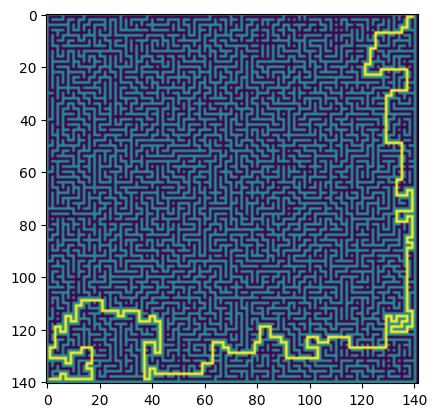

134588

In [144]:
## Part 1
from queue import PriorityQueue
from matplotlib import pyplot as plt

directions = {
"E":[(1,0,"E"),(0,1,"S"),(0,-1,"N")],
"W":[(-1,0,"W"),(0,1,"S"),(0,-1,"N")],
"N":[(0,-1,"N"),(1,0,"E"),(-1,0,"W")],
"S":[(0,1,"S"),(1,0,"E"),(-1,0,"W")]
}

def printMaze(maze,visited,end):
    sym = {"E":">","W":"<","N":"^","S":"v"}
    printMaze = [[1 if node == "#" else 0 for node in row] for row in maze]
    for node in visited:
        printMaze[node[1]][node[0]] = 2
    plt.imshow(printMaze)
    plt.show()
            
def getNeighbours(node,maze):
    cost,pos,dir,visited = node
    vectors = directions[dir] 
    neighbours = []
    for i in range(len(vectors)):
        dx,dy,coord = vectors[i]
        if maze[pos[1]+dy][pos[0]+dx] == "#":
            continue
        neighbour = (cost + (1 if i == 0 else 1001), (pos[0]+dx,pos[1]+dy), coord, visited.copy()+[(pos[0]+dx,pos[1]+dy)])
        neighbours.append(neighbour)
    return neighbours
        



maze, start, end = getInput()
pq = PriorityQueue()
pq.put((0,start,"E",[start]))
min_cost = float('inf')
junctions = {}

while not pq.empty():
    node = pq.get()
    cost,pos,dir,visited = node
    neighbours = getNeighbours(node, maze)

    if node[0] > min_cost:
        continue

    if len(neighbours) > 1:
        least = junctions.get(pos)
        if least is not None and least < cost:
            continue
        junctions[pos] = cost
        
    for neighbour in neighbours:
        if maze[neighbour[1][1]][neighbour[1][0]] == "E":
            printMaze(maze,neighbour[3],end)
            min_cost = min(min_cost,neighbour[0])
        elif neighbour[1] not in visited:
            if len(res) == 0 or neighbour[0] < min_cost:
                pq.put(neighbour)
            
                


min_cost-2*4

In [145]:
## Part 1
from queue import PriorityQueue
from matplotlib import pyplot as plt

directions = {
"E":[(1,0,"E"),(0,1,"S"),(0,-1,"N")],
"W":[(-1,0,"W"),(0,1,"S"),(0,-1,"N")],
"N":[(0,-1,"N"),(1,0,"E"),(-1,0,"W")],
"S":[(0,1,"S"),(1,0,"E"),(-1,0,"W")]
}
def printMaze(maze,visited,end):
    sym = {"E":">","W":"<","N":"^","S":"v"}
    printMaze = [[1 if node == "#" else 0 for node in row] for row in maze]
    for node in visited:
        printMaze[node[1]][node[0]] = 2
    plt.imshow(printMaze)
    plt.show()
            
def getNeighbours(node,maze):
    cost,pos,dir,visited = node
    vectors = directions[dir] 
    neighbours = []
    for i in range(len(vectors)):
        dx,dy,coord = vectors[i]
        if maze[pos[1]+dy][pos[0]+dx] == "#":
            continue
        neighbour = (cost + (1 if i == 0 else 1001), (pos[0]+dx,pos[1]+dy), coord, visited.copy()+[(pos[0]+dx,pos[1]+dy)])
        neighbours.append(neighbour)
    return neighbours
        



maze, start, end = getInput()
pq = PriorityQueue()
pq.put((0,start,"E",[start]))
min_cost = float('inf')
junctions = {}
tile_costs = {}
min_paths = set()

while not pq.empty():
    node = pq.get()
    cost,pos,dir,visited = node
    neighbours = getNeighbours(node, maze)

    for neighbour in neighbours:
            
        if cost > min_cost:
            continue

        if tile_costs.get((pos, dir), float('inf')) < cost:
            continue
            
        tile_costs[(pos, dir)] = cost

        
        if maze[neighbour[1][1]][neighbour[1][0]] == "E":
            if neighbour[0] < min_cost:
                    min_cost = cost
                    min_paths = set(neighbour[3])
            elif cost == min_cost:
                    min_paths |= set(neighbour[3])
        elif neighbour[1] not in visited:
            if neighbour[0] < min_cost:
                pq.put(neighbour)
            
                


print("The cheapest route through the maze is: " + str(min_cost+1))
print(str(len(min_paths)) + " is the number of unique paths where you can sit in the maze")

The cheapest route through the maze is: 134588
631 is the number of unique paths where you can sit in the maze
